In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
raw_df = pd.read_csv('charity_data.csv')
raw_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Cleaning the dataset

charity_df = raw_df.loc[raw_df["STATUS"]==1]
charity_df = charity_df.drop(columns=["EIN","NAME", "STATUS", "APPLICATION_TYPE"])

charity_df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,ProductDev,Association,0,N,5000,1
1,Independent,C2000,Preservation,Co-operative,Jan-99,N,108590,1
2,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [3]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [4]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()


AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

## Bucketing

In [5]:
# Print out the classification value counts
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts.head(20)

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
Name: CLASSIFICATION, dtype: int64

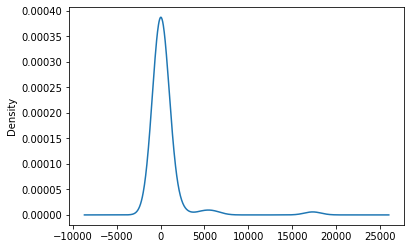

In [6]:
# Visualize the value counts
classification_counts.plot.density()

In [7]:
# Determine which values to replace
replace_classification = list(classification_counts[classification_counts < 200].index)

# Replace in DataFrame
for CLASSIFICATION in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(CLASSIFICATION,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

## one-hot encoding

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34290,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34291,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Merge one-hot encoded features and drop the originals
encodeCharity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
encodeCharity_df = encodeCharity_df.drop(charity_cat,1)
encodeCharity_df

,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,20197,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34290,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34291,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34292,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## StandardScaler

In [44]:
# Split our preprocessed data into our features and target arrays
y = encodeCharity_df["IS_SUCCESSFUL"]
X = encodeCharity_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [54]:
# Define the model - deep neural net
number_input_features = len(X_test_scaled[0])
hidden_nodes_layer1 =11
hidden_nodes_layer2=8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 11)                396       
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 9         
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [63]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=300,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
804/804 [==============================] - 1s 629us/step - loss: 0.6794 - accuracy: 0.5739
Epoch 2/300
146/804 [====>.........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5820
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 682us/step - loss: 0.6792 - accuracy: 0.5752
Epoch 3/300
316/804 [==========>...................] - ETA: 0s - loss: 0.6797 - accuracy: 0.5746
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 662us/step - loss: 0.6791 - accuracy: 0.5735
Epoch 4/300
553/804 [===================>..........] - ETA: 0s - loss: 0.6788 - accuracy: 0.5749
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 658us/step - loss: 0.6792 - accuracy: 0.5736
Epoch 5/300
765/804 [===========================>..] - ETA: 0s - loss: 0.6788 - accuracy: 0.5753
Epoch 00005: saving model to checkpoints/weights.05.hdf5
804/804 

804/804 [==============================] - 1s 628us/step - loss: 0.6781 - accuracy: 0.5768
Epoch 39/300
426/804 [==============>...............] - ETA: 0s - loss: 0.6781 - accuracy: 0.5774
Epoch 00039: saving model to checkpoints/weights.39.hdf5
804/804 [==============================] - 1s 633us/step - loss: 0.6781 - accuracy: 0.5768
Epoch 40/300
586/804 [====================>.........] - ETA: 0s - loss: 0.6782 - accuracy: 0.5778
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 628us/step - loss: 0.6781 - accuracy: 0.5760
Epoch 41/300
804/804 [==============================] - 0s 599us/step - loss: 0.6780 - accuracy: 0.5758
Epoch 42/300
  1/804 [..............................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5625
Epoch 00042: saving model to checkpoints/weights.42.hdf5
804/804 [==============================] - 0s 610us/step - loss: 0.6782 - accuracy: 0.5766
Epoch 43/300
170/804 [=====>........................] - ETA: 0s - l

Epoch 76/300
678/804 [========================>.....] - ETA: 0s - loss: 0.6774 - accuracy: 0.5770
Epoch 00076: saving model to checkpoints/weights.76.hdf5
804/804 [==============================] - 0s 609us/step - loss: 0.6774 - accuracy: 0.5773
Epoch 77/300
804/804 [==============================] - 0s 591us/step - loss: 0.6776 - accuracy: 0.5769
Epoch 78/300
 87/804 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.5866
Epoch 00078: saving model to checkpoints/weights.78.hdf5
804/804 [==============================] - 0s 614us/step - loss: 0.6773 - accuracy: 0.5773
Epoch 79/300
257/804 [========>.....................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5788
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 0s 613us/step - loss: 0.6774 - accuracy: 0.5767
Epoch 80/300
426/804 [==============>...............] - ETA: 0s - loss: 0.6785 - accuracy: 0.5737
Epoch 00080: saving model to checkpoints/weights.80.hdf5
804

804/804 [==============================] - 1s 640us/step - loss: 0.6772 - accuracy: 0.5787
Epoch 114/300
 83/804 [==>...........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.5768
Epoch 00114: saving model to checkpoints/weights.114.hdf5
804/804 [==============================] - 1s 668us/step - loss: 0.6771 - accuracy: 0.5770
Epoch 115/300
306/804 [==========>...................] - ETA: 0s - loss: 0.6751 - accuracy: 0.5780
Epoch 00115: saving model to checkpoints/weights.115.hdf5
804/804 [==============================] - 1s 704us/step - loss: 0.6771 - accuracy: 0.5778
Epoch 116/300
521/804 [==================>...........] - ETA: 0s - loss: 0.6774 - accuracy: 0.5766
Epoch 00116: saving model to checkpoints/weights.116.hdf5
804/804 [==============================] - 1s 673us/step - loss: 0.6770 - accuracy: 0.5783
Epoch 117/300
655/804 [=======================>......] - ETA: 0s - loss: 0.6759 - accuracy: 0.5793
Epoch 00117: saving model to checkpoints/weights.117.hdf5
804/804 

804/804 [==============================] - 1s 645us/step - loss: 0.6768 - accuracy: 0.5781
Epoch 151/300
333/804 [===========>..................] - ETA: 0s - loss: 0.6773 - accuracy: 0.5785
Epoch 00151: saving model to checkpoints/weights.151.hdf5
804/804 [==============================] - 1s 628us/step - loss: 0.6769 - accuracy: 0.5793
Epoch 152/300
557/804 [===================>..........] - ETA: 0s - loss: 0.6763 - accuracy: 0.5798
Epoch 00152: saving model to checkpoints/weights.152.hdf5
804/804 [==============================] - 1s 652us/step - loss: 0.6768 - accuracy: 0.5784
Epoch 153/300
725/804 [==========================>...] - ETA: 0s - loss: 0.6766 - accuracy: 0.5791
Epoch 00153: saving model to checkpoints/weights.153.hdf5
804/804 [==============================] - 1s 639us/step - loss: 0.6769 - accuracy: 0.5775
Epoch 154/300
804/804 [==============================] - 0s 607us/step - loss: 0.6769 - accuracy: 0.5777
Epoch 155/300
169/804 [=====>........................] - ETA

804/804 [==============================] - 1s 687us/step - loss: 0.6764 - accuracy: 0.5792
Epoch 188/300
618/804 [======================>.......] - ETA: 0s - loss: 0.6761 - accuracy: 0.5798
Epoch 00188: saving model to checkpoints/weights.188.hdf5
804/804 [==============================] - 1s 666us/step - loss: 0.6766 - accuracy: 0.5788
Epoch 189/300
804/804 [==============================] - 1s 654us/step - loss: 0.6764 - accuracy: 0.5791
Epoch 190/300
  1/804 [..............................] - ETA: 0s - loss: 0.6784 - accuracy: 0.5625
Epoch 00190: saving model to checkpoints/weights.190.hdf5
804/804 [==============================] - 1s 687us/step - loss: 0.6764 - accuracy: 0.5785
Epoch 191/300
232/804 [=======>......................] - ETA: 0s - loss: 0.6760 - accuracy: 0.5800
Epoch 00191: saving model to checkpoints/weights.191.hdf5
804/804 [==============================] - 1s 671us/step - loss: 0.6766 - accuracy: 0.5782
Epoch 192/300
385/804 [=============>................] - ETA

804/804 [==============================] - 1s 694us/step - loss: 0.6761 - accuracy: 0.5788
Epoch 225/300
804/804 [==============================] - 1s 663us/step - loss: 0.6764 - accuracy: 0.5793
Epoch 226/300
 79/804 [=>............................] - ETA: 0s - loss: 0.6778 - accuracy: 0.5787
Epoch 00226: saving model to checkpoints/weights.226.hdf5
804/804 [==============================] - 1s 666us/step - loss: 0.6763 - accuracy: 0.5784
Epoch 227/300
227/804 [=======>......................] - ETA: 0s - loss: 0.6727 - accuracy: 0.5877
Epoch 00227: saving model to checkpoints/weights.227.hdf5
804/804 [==============================] - 1s 665us/step - loss: 0.6763 - accuracy: 0.5787
Epoch 228/300
469/804 [================>.............] - ETA: 0s - loss: 0.6767 - accuracy: 0.5740
Epoch 00228: saving model to checkpoints/weights.228.hdf5
804/804 [==============================] - 1s 663us/step - loss: 0.6762 - accuracy: 0.5789
Epoch 229/300
665/804 [=======================>......] - ETA

146/804 [====>.........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.5771
Epoch 00262: saving model to checkpoints/weights.262.hdf5
804/804 [==============================] - 1s 665us/step - loss: 0.6762 - accuracy: 0.5784
Epoch 263/300
312/804 [==========>...................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5776
Epoch 00263: saving model to checkpoints/weights.263.hdf5
804/804 [==============================] - 1s 675us/step - loss: 0.6761 - accuracy: 0.5776
Epoch 264/300
541/804 [===================>..........] - ETA: 0s - loss: 0.6772 - accuracy: 0.5772
Epoch 00264: saving model to checkpoints/weights.264.hdf5
804/804 [==============================] - 1s 669us/step - loss: 0.6761 - accuracy: 0.5796
Epoch 265/300
682/804 [========================>.....] - ETA: 0s - loss: 0.6756 - accuracy: 0.5790
Epoch 00265: saving model to checkpoints/weights.265.hdf5
804/804 [==============================] - 1s 680us/step - loss: 0.6761 - accuracy: 0.5786
Epoch 266/300
804/804 

374/804 [============>.................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5756
Epoch 00299: saving model to checkpoints/weights.299.hdf5
804/804 [==============================] - 1s 672us/step - loss: 0.6760 - accuracy: 0.5793
Epoch 300/300
521/804 [==================>...........] - ETA: 0s - loss: 0.6756 - accuracy: 0.5789
Epoch 00300: saving model to checkpoints/weights.300.hdf5
804/804 [==============================] - 1s 674us/step - loss: 0.6758 - accuracy: 0.5789
268/268 - 0s - loss: 0.6879 - accuracy: 0.5681
Loss: 0.6879030466079712, Accuracy: 0.5680625438690186


In [64]:
# Define the model - deep neural net
number_input_features = len(X_test_scaled[0])
hidden_nodes_layer1 =11
hidden_nodes_layer2=8

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.242.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6865 - accuracy: 0.5672
Loss: 0.6864635944366455, Accuracy: 0.5672460198402405
